# Applying Fruchterman-Reingold force-directed algorithm to dataset to find node positions

Input can be real datasets in csv, and export will be made to fit the needs of Tableau, in csv.
By Daan Tor @
https://github.com/hammer-of-thor 

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx.drawing.nx_agraph import graphviz_layout

Declare network graph object.

In [48]:
G=nx.Graph()

Add nodes and edges.

In [49]:
inputedges = pd.read_csv('edges.csv')
inputnodes = pd.read_csv('nodes.csv')

for i,r in inputnodes.iterrows():
    G.add_node(r['ID'])
    
for i,r in inputedges.iterrows():
    G.add_edge(r['Source'],r['Target'])

Apply Fruchterman-Reingold force-directed algorithm to data.

In [50]:
pos=nx.circular_layout(G, scale=100)

Set result dataset positions as positions to be used in graph.

In [51]:
nx.set_node_attributes(G,'pos',pos)

Draw, save and show graphs.

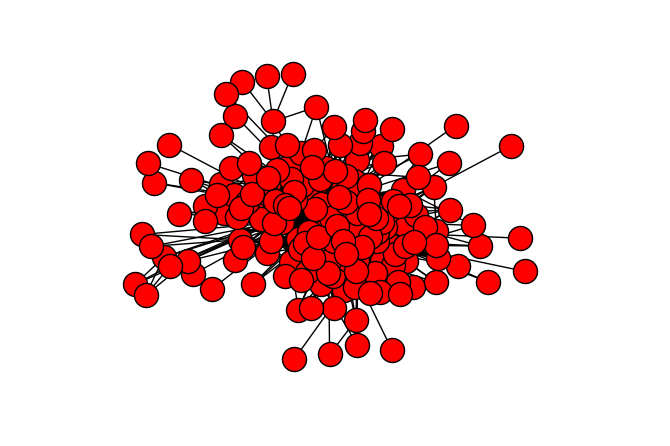

In [57]:
nx.draw_spring(G, nodesize=0.00001)
plt.savefig("network_graph.png")
plt.show()

Structure output in pandas dataframe.

In [41]:
nodesframe = pd.DataFrame(G.node)
throughputframe = nodesframe.transpose()
outputframe = pd.concat([throughputframe['pos'].str[0],throughputframe['pos'].str[1]], axis=1)
outputframe.columns = ['X','Y']

Export to csv.

In [42]:
outputframe.to_csv('nodepositions.csv', encoding='utf-16', index_label='ID')